In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

from matrixprofile import *

In [2]:
X_train_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled_max.npy")
X_test_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled_max.npy")
X_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_decimated_scaled_max.npy")
df_decimated_scaled_max=pd.DataFrame(X_decimated_scaled_max)

In [3]:
centroid1=np.load("kmeans_dtw_2nd_centroid.npy")

In [4]:
centroid1.shape

(50,)

## Motifs

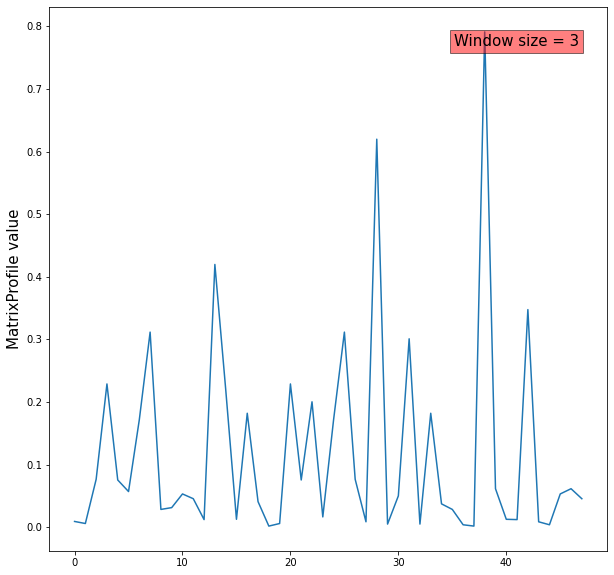

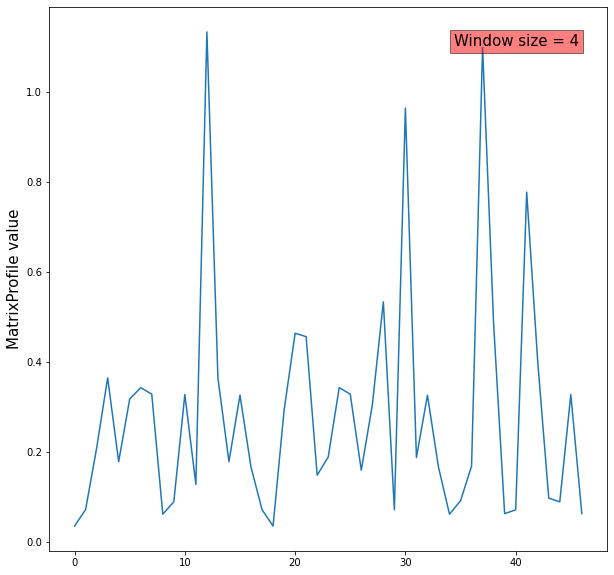

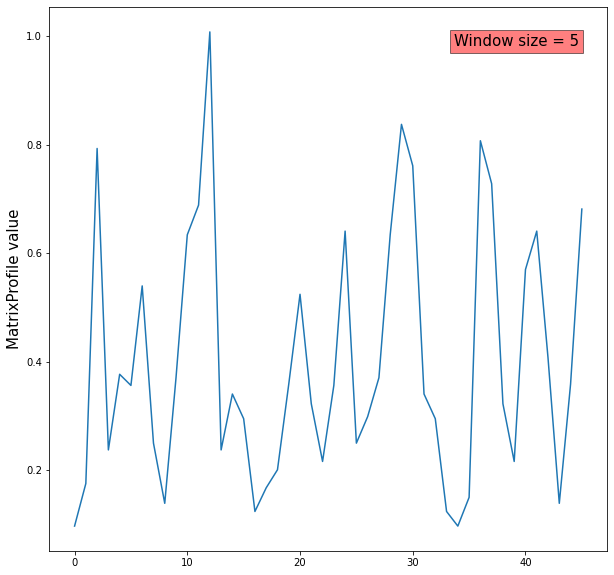

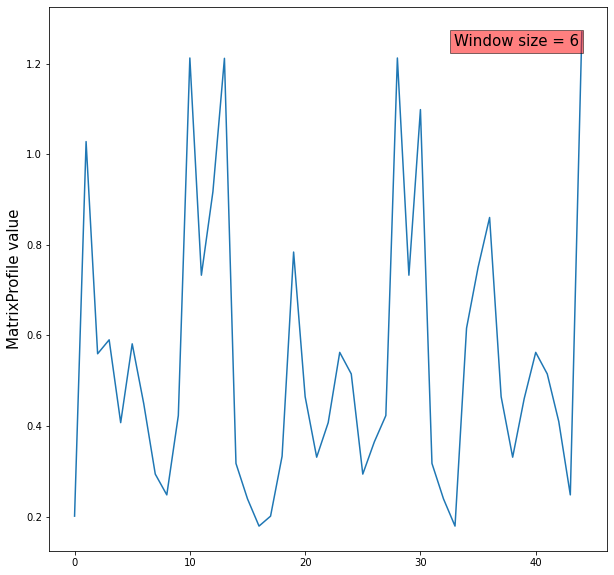

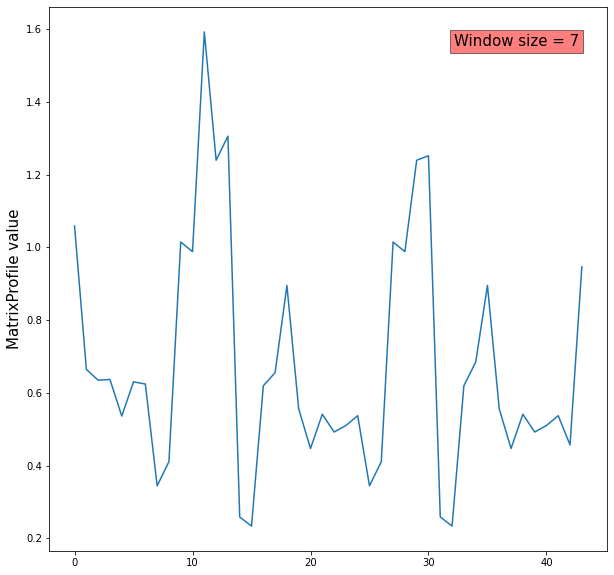

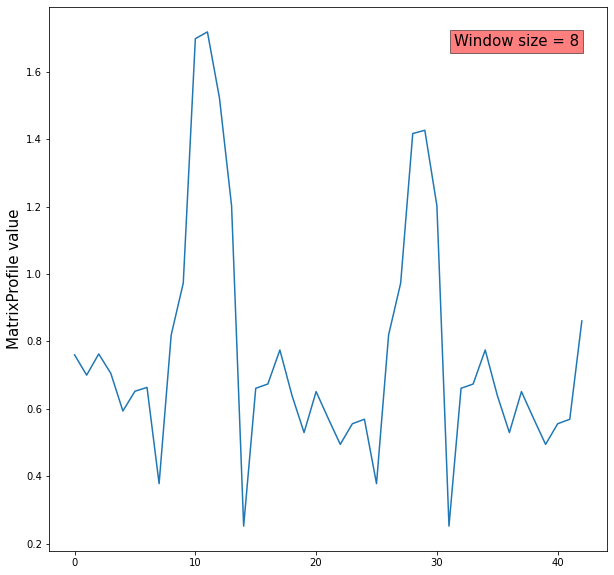

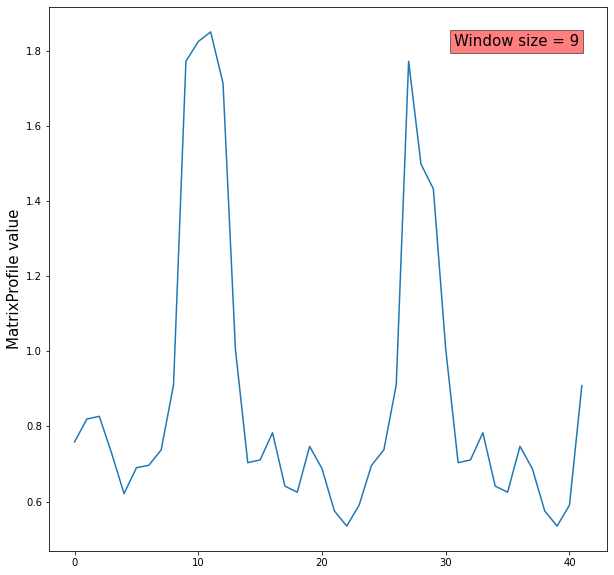

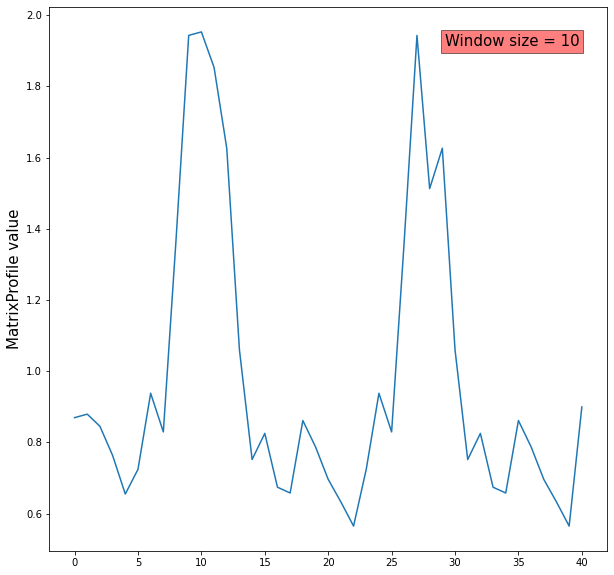

In [5]:
for w in range(3,11):
    mp1, mpi1 = matrixProfile.stomp(centroid1, w)
    plt.figure(figsize=(10,10))
    plt.plot(mp1)
    plt.ylabel("MatrixProfile value", fontsize=15)
    plt.text(0.95, 0.95, "Window size = "+str(w), fontsize=15, bbox=dict(facecolor="red", alpha=0.5), transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')
    plt.show()

In [6]:
w=7
mp1, mpi1 = matrixProfile.stomp(centroid1, w)
mo1, mod1  = motifs.motifs(centroid1, (mp1, mpi1), max_motifs=5)
print(mo1)

[[15, 32], [7, 25, 42], [2, 20, 37]]


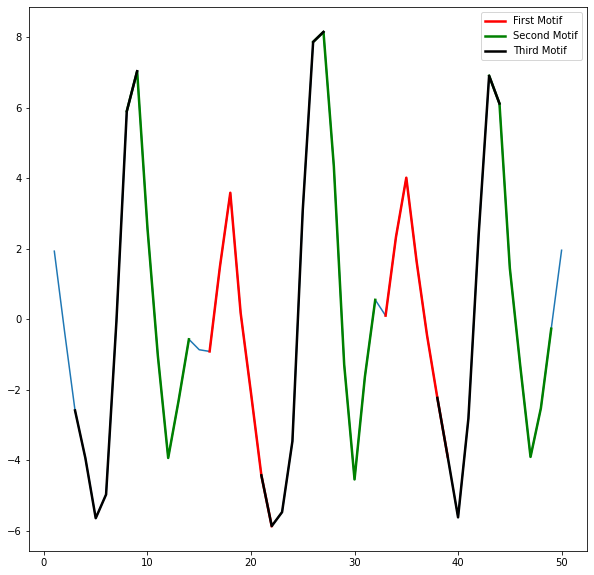

In [7]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,len(centroid1)+1),centroid1)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo1)]
for m, d, c in zip(mo1, mod1, colors):
    if c=="r":
        for i in m:
            if i==mo1[0][0]:
                m_shape = centroid1[i:i+w]
                plt.plot(range(i+1,i+w+1), m_shape, color=c, lw=2.5, label="First Motif")
            else:
                m_shape = centroid1[i:i+w]
                plt.plot(range(i+1,i+w+1), m_shape, color=c, lw=2.5)                
    elif c=="g":
        for i in m:
            if i==mo1[1][0]:
                m_shape = centroid1[i:i+w]
                plt.plot(range(i+1,i+w+1), m_shape, color=c, lw=2.5, label="Second Motif")
            else:
                m_shape = centroid1[i:i+w]
                plt.plot(range(i+1,i+w+1), m_shape, color=c, lw=2.5) 
    elif c=="k":
        for i in m:
            if i==mo1[2][0]:
                m_shape = centroid1[i:i+w]
                plt.plot(range(i+1,i+w+1), m_shape, color=c, lw=2.5, label="Third Motif")
            else:
                m_shape = centroid1[i:i+w]
                plt.plot(range(i+1,i+w+1), m_shape, color=c, lw=2.5)
    elif c=="b":
        for i in m:
            if i==mo1[3][0]:
                m_shape = centroid1[i:i+w]
                plt.plot(range(i+1,i+w+1), m_shape, color=c, lw=2.5, label="Fourth Motif")
            else:
                m_shape = centroid1[i:i+w]
                plt.plot(range(i+1,i+w+1), m_shape, color=c, lw=2.5)
    elif c=="y":
        for i in m:
            if i==mo1[4][0]:
                m_shape = centroid1[i:i+w]
                plt.plot(range(i+1,i+w+1), m_shape, color=c, lw=2.5, label="Fifth Motif")
            else:
                m_shape = centroid1[i:i+w]
                plt.plot(range(i+1,i+w+1), m_shape, color=c, lw=2.5)
plt.legend()       
plt.show()

## Anomaly

In [8]:
from matrixprofile.discords import discords

In [9]:
centroid1_last=np.load("kmeans_dtw_2last_centroid.npy")

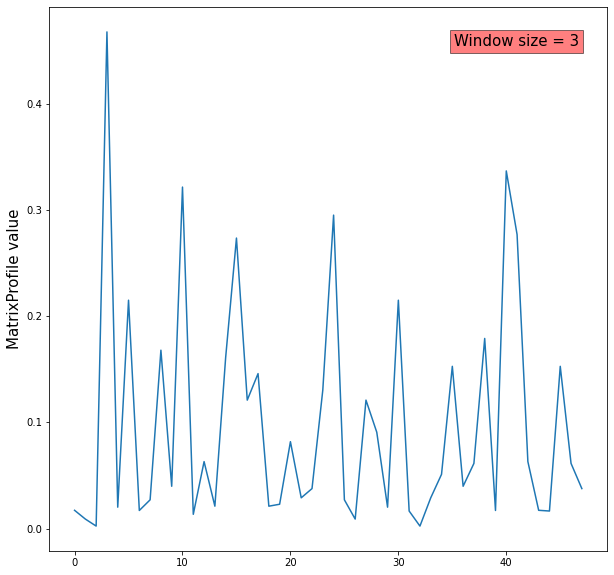

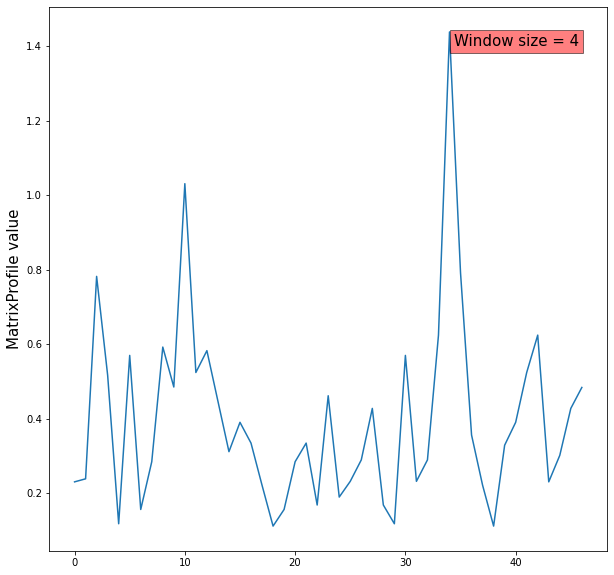

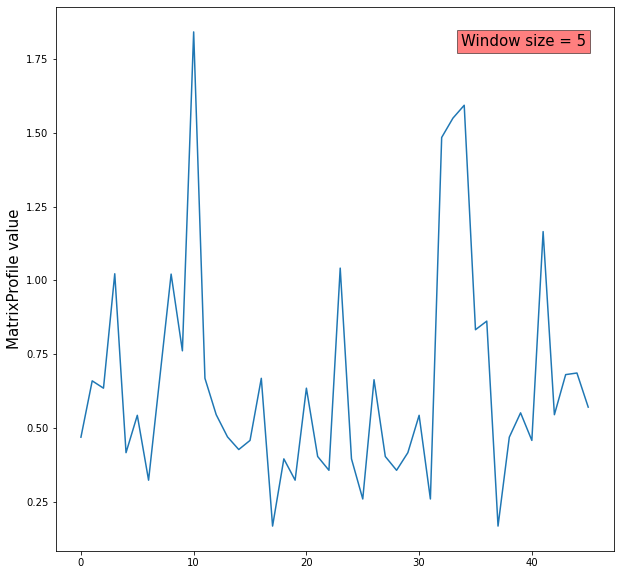

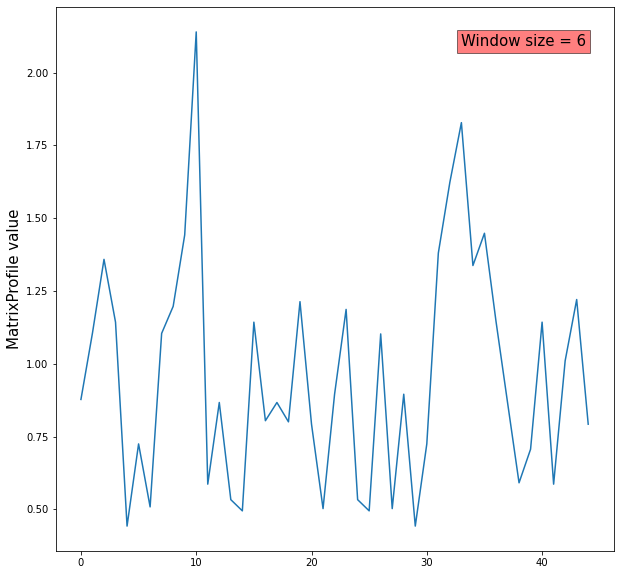

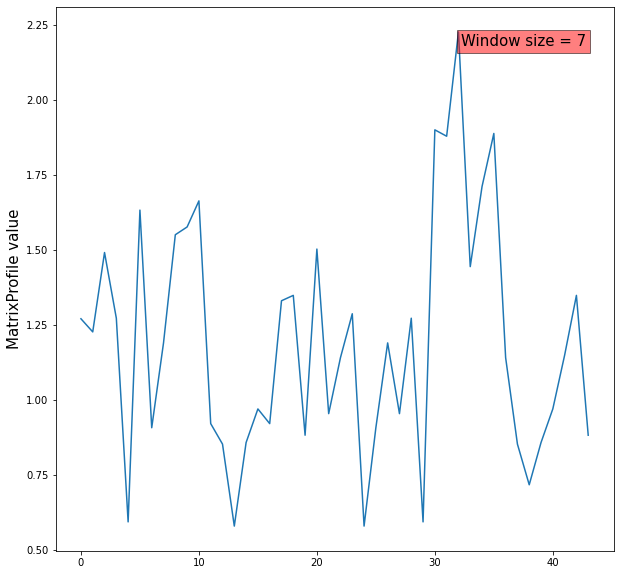

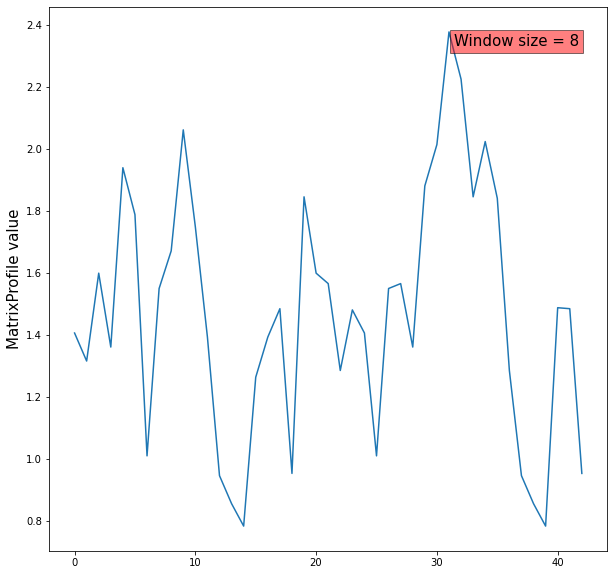

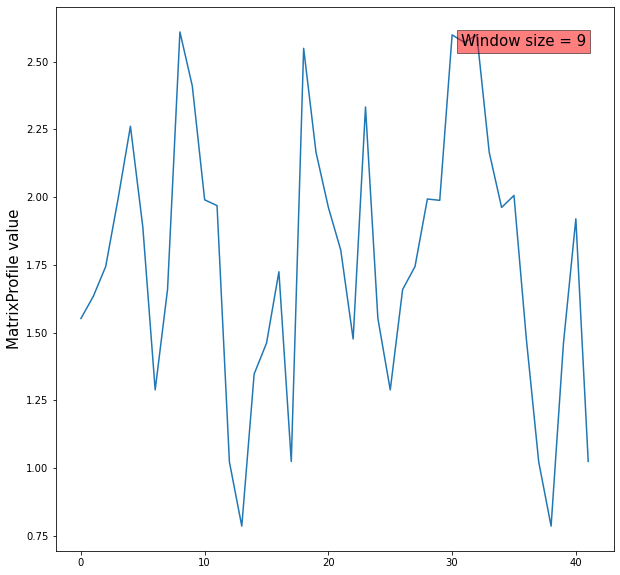

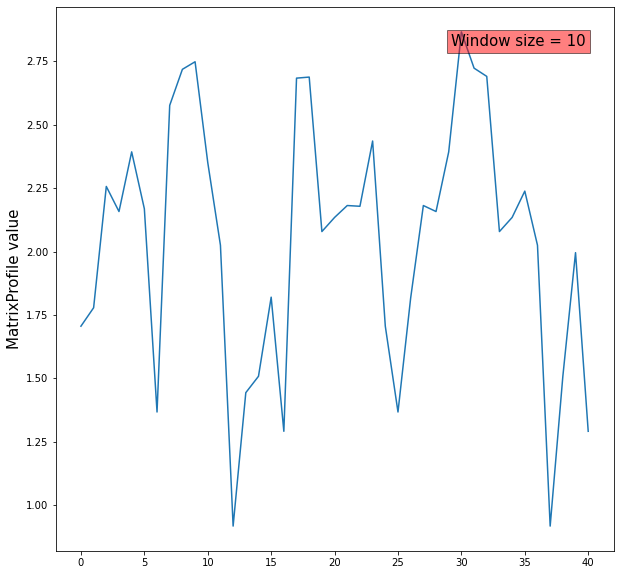

In [10]:
for w in range(3,11):
    mp1, mpi1 = matrixProfile.stomp(centroid1_last, w)
    plt.figure(figsize=(10,10))
    plt.plot(mp1)
    plt.ylabel("MatrixProfile value", fontsize=15)
    plt.text(0.95, 0.95, "Window size = "+str(w), fontsize=15, bbox=dict(facecolor="red", alpha=0.5), transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')
    plt.show()

In [11]:
w=5
mp1, mpi1 = matrixProfile.stomp(centroid1_last, w)
anoms1 = discords(mp1, ex_zone=3, k=5)
print(anoms1)

[10 34 41 23  3]


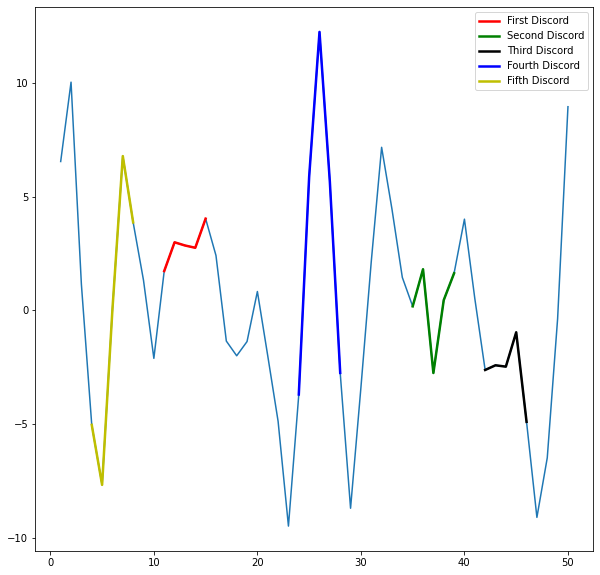

In [12]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,len(centroid1_last)+1),centroid1_last)
colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms1)]
for a, c in zip(anoms1, colors):
    if c=="r":
        a_shape = centroid1_last[a:a+w]
        plt.plot(range(a+1,a+w+1), a_shape, color=c, lw=2.5, label="First Discord")               
    if c=="g":
        a_shape = centroid1_last[a:a+w]
        plt.plot(range(a+1,a+w+1), a_shape, color=c, lw=2.5, label="Second Discord") 
    if c=="k":
        a_shape = centroid1_last[a:a+w]
        plt.plot(range(a+1,a+w+1), a_shape, color=c, lw=2.5, label="Third Discord")
    if c=="b":
        a_shape = centroid1_last[a:a+w]
        plt.plot(range(a+1,a+w+1), a_shape, color=c, lw=2.5, label="Fourth Discord")
    if c=="y":
        a_shape = centroid1_last[a:a+w]
        plt.plot(range(a+1,a+w+1), a_shape, color=c, lw=2.5, label="Fifth Discord")
plt.legend()       
plt.show()